In [2]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

from scipy import signal

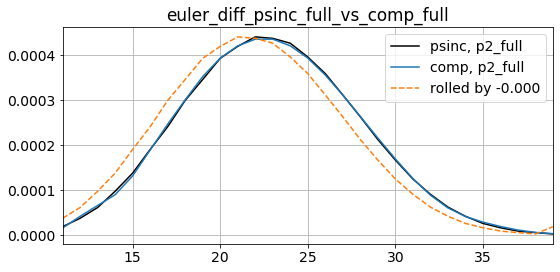

In [11]:
attributes = ['rho','rhou','rhov','rhoY','p2_nodes']
attributes = ['p2_nodes']
attributes = ['p2_half']

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"

# base_fn = "output_swe_vortex"
# directory = "output_swe_vortex"

py_directory = "../%s/" %directory

et = 1.0
swe = 'swe' in base_fn
if swe:
    Nx, Ny, Nz = 64, 1, 64
    tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)
else:
    Nx, Ny = 64, 64
    tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

p_ref = 8.61 * 1e4
p_ref = 1.0
times = np.arange(0,176)[10:40]#[145:155]#[25:35]#[20:30]
# times = np.arange(0.0,1.01,0.01)[1:][:20]
t_axs = np.linspace(0.0,1.0,5)
t_pos = np.linspace(0,175,5)
probe_loc = [32,32]
# l_typ = 'TIME'
l_typ = 'WINDOW_STEP'
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(sfx , diff, attribute):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff)
    if swe: ens = ens[:,:,0,:]
    probe = ens[:,probe_loc[0],probe_loc[1]] * p_ref
    
#     probe -= probe.mean()
    label = sfx + '_' + attribute
    return label, probe

pls = []

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' or attribute == 'p2_half' else False

    sfx1 = 'debug_rkadv_psinc'
#     sfx1 = 'comp_bal_noib'
#     sfx1 = 'debug_rkadv_comp'

    attribute1 = 'p2_nodes'
#     attribute1 = 'p2_half'
    l1_attr = np.copy(attribute1)

    l1, p1 = get_ens(sfx1, diff, attribute1)
#     l2, p2 = get_ens(sfx2, diff, attribute)
    sfx3 = 'comp_bal_noib'
#     sfx3 = 'psinc_noib'
#     sfx3 = 'debug_rkadv_psinc'
    sfx3 = 'debug_rkadv_comp'
    attribute3 = 'p2_nodes'
#     attribute3 = 'p2_half'
    l3, p3 = get_ens(sfx3, diff, attribute3)

    pl = pt.plotter_1d(figsize=(8,4),fontsize=14,ncols=1,nrows=1)
    ax = pl.get_ax(i)

    if diff == True: times = times[1:]
    
    ref = 'Lake' if swe else 'psinc'
    full = 'SWE' if swe else 'comp'
    ic = 'imbal.' if 'imbal' in sfx3 else 'bal.'
    
    if 'nodes' in attribute1:
        l1_attr = 'p2_full'
    else:
        l1_attr = attribute1

    if 'nodes' in attribute3:
        l3_attr = 'p2_full'
    else:
        l3_attr = attribute3
    
    if 'comp' in l1:
        l1 = '%s, %s' %(full, l1_attr)
        l1c = full
    else:
        l1 = '%s, %s' %(ref, l1_attr)
        l1c = ref
        
    if 'comp' in l3:
        l3 = '%s, %s' %(full, l3_attr)
        l3c = full
    else:
        l3 = '%s, %s' %(ref, l3_attr)
        l3c = ref
        
    if l1c is not l3c:
        p1 -= p1.mean()
        p1 += p3.mean()
        
    ins = p1
    beta = 0.0/8
    shift = -1
    rolled = np.roll(ins,shift)
    rolled = (beta * ins + (1.0-beta) * rolled)
    beta = np.sign(shift) * beta
    rsfx = 'rolled by %.3f' %beta

    l1t = str(l1_attr)[3:]
    l3t = str(l3_attr)[3:]
#     
    l2 = '%s, imbal. IC w/ blending w/ time-shift' %full
#     l3 = '%s %s, %s' %(full, ic, attribute)
#     l3 = '%s %s' %(ref, attribute)
    
    ax.plot(times, p1, 'k', label=l1)
#     ax.plot(times, p2, label=l2)
    ax.plot(times, p3, label=l3)
    ax.plot(times, rolled, '--',label=rsfx)
# 
    if swe:
        tcl = 'SWE vortex'
        qty = '$\delta h$'
    else:
        tcl = 'Euler vortex'
        qty = '$\delta \pi$'

    fn = 'euler_diff_%s_%s_vs_%s_%s' %(l1c, l1t, l3c, l3t)
#     fn = 'comp_half_vs_comp_full'
    ax.set_title("%s" %(fn))
    ax.set_xlim([times[0],times[-1]])
#     ax.set_xlabel(r'time')
#     ax.set_xticks(t_pos)
#     ax.set_xticklabels(t_axs)
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
#     fn = 'swe' if swe else 'euler'
    pl.save_fig('%s' %fn)
    
    prt.prtt('plt')

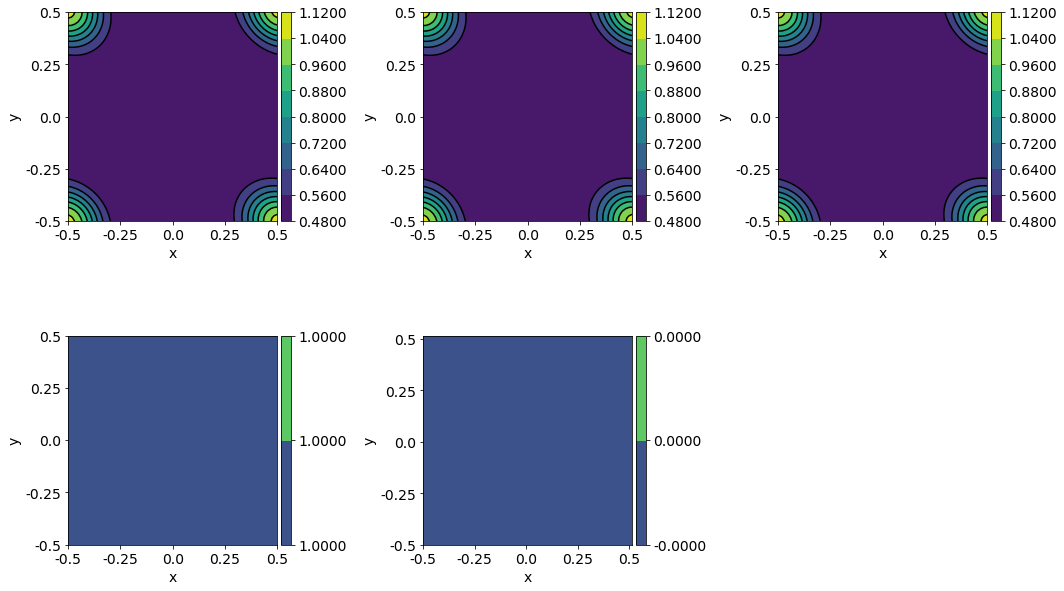

In [90]:
attributes = ['rho','rhou','rhov','rhoY','p2_nodes']
et = 1.0

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx, Ny = 64, 64
euler_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
tags =  euler_tc.get_tag_dict()

# times = np.arange(0,176)#[:50]
times = [142]
l_typ = 'WINDOW_STEP'
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(tc, sfx , diff, attribute, swe=True):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag=tags[9])[0]
    if swe: ens = ens[:,0,:]

    label = sfx + '_' + attribute
    return label, ens

diff = False
sfx1 = 'debug_rkadv_psinc'

pl_lst = []
for attribute in attributes:
    l2, a2 = get_ens(euler_tc, sfx1, diff, attribute, swe=False)
    pl_lst.append([a2,''])
    
pl = pt.plotter(pl_lst,ncols=3,figsize=](15,10),sharey=False)
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Ny-1,5)
x_label = r'x'
y_label = r'y'

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(aspect='equal',method='contour')

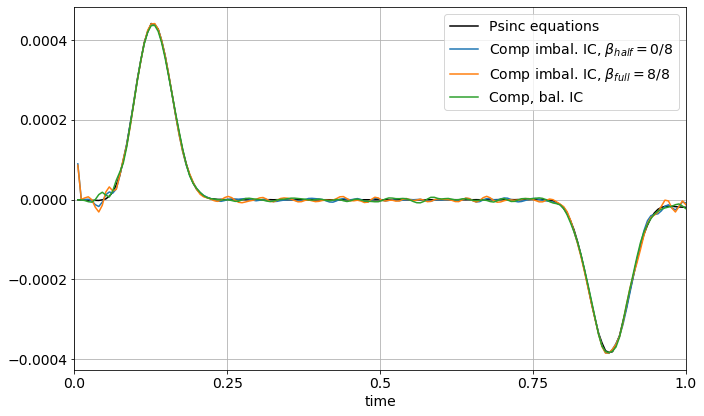

In [77]:
attributes = ['rho','rhou','rhov','rhoY','p2_nodes']
attributes = ['p2_nodes']
# attributes = ['p2_half']

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"

# base_fn = "output_swe_vortex"
# directory = "output_swe_vortex"

py_directory = "../%s/" %directory

et = 1.0
swe = 'swe' in base_fn
if swe:
    Nx, Ny, Nz = 64, 1, 64
    tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)
else:
    Nx, Ny = 64, 64
    tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

p_ref = 8.61 * 1e4
p_ref = 1.0
times = np.arange(0,176)#[:50]
# times = np.arange(0.0,1.01,0.01)[1:][:20]
t_axs = np.linspace(0.0,1.0,5)
t_pos = np.linspace(0,175,5)
probe_loc = [32,32]
# l_typ = 'TIME'
l_typ = 'WINDOW_STEP'
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(sfx , diff, attribute):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff)
    if swe: ens = ens[:,:,0,:]
    probe = ens[:,probe_loc[0],probe_loc[1]] * p_ref
    
    probe -= probe.mean()
    label = sfx + '_' + attribute
    return label, probe

pls = []

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False

    sfx1 = 'debug_rkadv_psinc'
#     sfx2 = 'comp_imbal_ib'
#     sfx2 = 'comp_debug_ib_8'
#     sfx2 = 'comp_imbal_half_ib-6'
#     sfx2a = 'comp_imbal_half_ib-4'
#     sfx2b = 'comp_imbal_half_ib-6'
#     sfx2c = 'comp_imbal_half_ib-8'
    sfx2a = 'debug_rkadv_comp_half_ib-0'
    sfx2b = 'debug_rkadv_comp_full_ib-16'
    sfx2c = 'debug_rkadv_comp_half_ib-4'
    sfx3 = 'comp_bal_noib'
#     sfx3 = 'comp_imbal_full_ib-10'
#     sfx3 = 'comp_debug_ib'

    l1, p1 = get_ens(sfx1, diff, attribute)
    l2a, p2a = get_ens(sfx2a, diff, attribute)
    l2b, p2b = get_ens(sfx2b, diff, attribute)
    l2c, p2c = get_ens(sfx2c, diff, attribute)
    attribute = 'p2_nodes'
    l3, p3 = get_ens(sfx3, diff, attribute)

    fs = (8,4) # fs used in write-up for first pub
    fs = (10,6)
    pl = pt.plotter_1d(figsize=fs,fontsize=14,ncols=1,nrows=1)
    ax = pl.get_ax(i)

    if diff == True: times = times[1:]

    ins = p1
    beta = 5.0/8
    rolled = np.roll(ins,-1)
    rolled = (beta * ins + (1.0-beta) * rolled)
    rsfx = 'rolled by %.3f' %beta
    
    ref = 'Lake' if swe else 'Psinc'
    full = 'SWE' if swe else 'Comp'
    ic = 'imbal.' if 'imbal' in sfx3 else 'bal.'
    l1 = '%s equations' %ref
#     l2 = '%s, imbal. IC with blending' %full
    l2a = r'Comp imbal. IC, $\beta_{half}=0/8$'
    l2b = r'Comp imbal. IC, $\beta_{full}=8/8$'
#     l2c = r'Comp imbal. IC, $\beta_{half}=2/8$'
    l3 = '%s, %s IC' %(full, ic)
    
    ax.plot(times, p1, 'k', label=l1)
    ax.plot(times, p2a, label=l2a)
    ax.plot(times, p2b, label=l2b)
#     ax.plot(times, p2c, label=l2c)
    ax.plot(times, p3, label=l3)
#     ax.plot(times, rolled, '--',label=rsfx)

    if swe:
        tcl = 'SWE vortex'
        qty = '$\delta h$'
    else:
        tcl = 'Euler vortex'
        qty = '$\delta \pi$'

#     ax.set_title("%s: probe measurement of %s at [%i,%i]" %(tcl, qty, probe_loc[0]-32,probe_loc[1]-32))
    ax.set_xlim([times[0],times[-1]])
    ax.set_xlabel(r'time')
    ax.set_xticks(t_pos)
    ax.set_xticklabels(t_axs)
    ax.grid()
    ax.legend()
#     ax.set_xlim([176*0.10,176*0.40])
#     ax.set_ylim([-0.0001,0.0005])
    
    pl.img.tight_layout()
    
    fn = 'swe' if swe else 'euler'
#     pl.save_fig('%s_w_%s' %(fn, ic))
    pl.save_fig('euler_best_comparisons')
    
    prt.prtt('plt')